<span style="font-size: 18px; font-weight: bold">PASTICIER Benjamin</span><br>
<span style="font-size: 18px; font-weight: bold">WEIZMANN Allan</span><br>
<br><br>

<center><span style="font-size: 40px; font-weight: bold">LU3PY121 - Electromagntésime et Optique</span></center><br>
<center><span style="font-size: 35px; font-weight: bold">TP2 - Polarisation</span></center>
<br><br>

<span style="font-size: 30px; font-weight: bold">Sommaire</span>

1. <a href="#Sec1"><span style="font-size: 20px;">Introduction</span></a>
2. <a href="#Sec2"><span style="font-size: 20px;">Production de lumière polarisée linéairement</span></a>
2. <a href="#Sec3"><span style="font-size: 20px;"> Modification de la polarisation de la lumière par des lames biréfringentes</span></a>
3. <a href="#Sec4"><span style="font-size: 20px;">Polarisation par réflexion vitreuse : mesure de l’angle de Brewster</span></a>
5. <a href="#Sec5"><span style="font-size: 20px;">Conclusion</span></a>

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Introduction</span> <a class="anchor" id="Sec1"></a>

L'objectif de ce TP est de comprendre comment manipuler la polarisation d'un faisceau de lumière. Pour ce faire, nous utiliserons des intruments optiques : polariseurs, lames biréfringentes, lames quart d'onde et demi-onde, laser.

In [1]:
# Importation des librairies utiles
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<br><br><br>
<span style="font-size: 30px; font-weight: bold">Production de lumière polarisée linéairement - Loi de Malus</span> <a class="anchor" id="Sec2"></a>

Tout d'abord, nous allons regarder si la lumière produite par le laser est polarisée ou non. Pour ce faire, on place un polariseur devant notre laser, et on regarde la lumière en sortie de celui-ci sur un écran.

On remarque que pour un angle de pi/2, la lumière en sortie du polariseur devient très faible, mais ne disparaît pas complètement. On peut supposer que le polariseur n'absorbe pas 100% de la lumière sur son axe mais une grande majorité. Le laser est donc dans ce cas polarisé verticalement, et on pourrait se passer de placer un polariseur en aval. Cependant, afin de bien visualiser l'état de polarisation du faisceau, on place un polariseur après le laser de manière à ce la polarisation ne change pas.
On remarque alors que l'angle noté sur le polariseur correspondant à une polarisation identique au laser est 2°.

<br>

On place ensuite un analyseur à la suite de notre polariseur (l'analyseur n'est rien d'autre qu'un polariseur, placé après un autre polariseur), et une photodiode qui mesure l'intensité lumineuse du faisceau en sortie de notre système optique.
Nous allons vérifier expérimentalement la loi de Malus, qui nous donne l'intensité I en sortie d'un analyseur en fonction de I0 l'intensité en sortie d'un polariseur, avec $\alpha$ l'angle entre le polariseur et l'analyseur :
$$ I = I_0 cos^2\alpha$$
Pour cela, on place le polariseur dans une position telle que $I = 0$, soit théoriquement avec un angle $\alpha = 90°$ entre son axe et celui du polariseur. A partir de cette position, on fait tourner l'analyseur et on mesure ainsi la tension en sortie de la photodiode en fonction de $\alpha$, ce qui nous permettra de vérifier la loi de malus.

Les valeurs de tension en sortie de la photodiode traduisent la valeur de l'intensité du champ électrique reçu, et peuvent donc être substituées à I dans notre modèle : la loi de Malus devrait toujours être vérifiée.

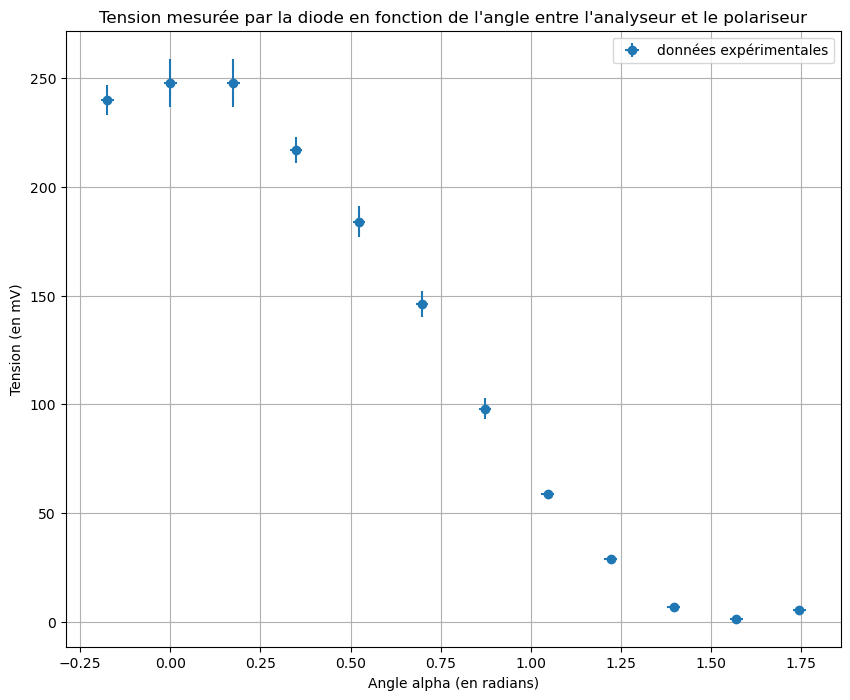

In [26]:
#Mesures
angle = (np.array([100, 90, 80,70,60,50,40,30,20,10,0, -10]))*np.pi/180  #en radians
tension = np.array([5.4, 1.4, 6.8, 28.6, 58.6, 98.0, 146.0, 184.0, 217, 248, 248, 240]) #en mV

erreurs_angle = (np.full(len(angle), 1))*np.pi/180 #en radians
erreurs_tension = np.array([0.1, 0.1, 0.1, 0.1, 2, 5, 6, 7, 6, 11, 11, 7]) #en mV

# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(angle,tension, yerr=erreurs_tension, xerr=erreurs_angle, fmt='o', label="données expérimentales")
plt.xlabel("Angle alpha (en radians)")
plt.ylabel("Tension (en mV)")
plt.title("Tension mesurée par la diode en fonction de l'angle entre l'analyseur et le polariseur")
plt.legend()
plt.grid()

L'erreur sur les angles est déterminée par l'erreur humaine, et on l'estime à 1°.

L'erreur sur les tensions est déterminée par la variation de la mesure de notre multimètre. En effet, celui-ci n'est pas parfaitement précis à $\alpha$ fixé et on regarde donc les oscillations de la mesure de tension pour chaque angle. La valeur retenue est la tension moyenne, et l'erreur est prise comme la moitié de l'écart entre la plus haute et la plus basse tension affichée.

On peut également voir que pour $\alpha = 0$, notre tension de sortie n'est pas égale à 0. Cela peut être du à la lumière dans la pièce ou d'autres paramètres et pour essayer de les prendre en compte, on introduit une constante C dans notre modèle pour la loi de Malus :
$$ I = I_0 cos^2\alpha + C$$


IO opti = 241.5609099567047 +- 8.264747106746457
C opti = -0.15602896671172164 +- 0.5306456449714448


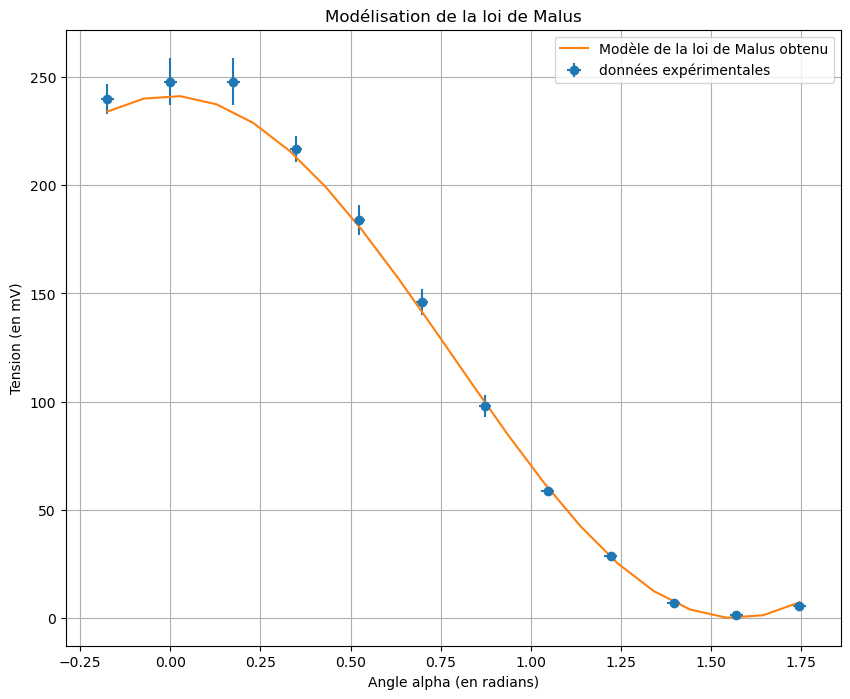

In [33]:
# Modèle
def Malus(x,I0, C):
    ''' 
    Renvoie la valeur théorique de I selon alpha
    '''
    return I0*(np.cos(x)**2) + C

# Paramètres initiaux
I0init = 250
Cinit = 0.1
alpha0init = 0.01
p0 = np.array([I0init, Cinit]) 

# Ajustement
popt, cov = curve_fit(Malus, angle, tension, sigma=erreurs_tension, p0=p0)
I0_opti = popt[0] # les paramètres d'ajustement
C_opti = popt[1]
erreur_I0 = np.sqrt(cov[0,0])
erreur_C = np.sqrt(cov[1,1])

print(f"IO opti = {I0_opti} +- {erreur_I0}")
print(f"C opti = {C_opti} +- {erreur_C}")

# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(angle,tension, yerr=erreurs_tension, xerr=erreurs_angle, fmt='o', label="données expérimentales")
xplot = np.linspace(-10*np.pi/180, 100*np.pi/180, 20)
plt.plot(xplot, Malus(xplot, I0_opti, C_opti), label="Modèle de la loi de Malus obtenu")
plt.xlabel("Angle alpha (en radians)")
plt.ylabel("Tension (en mV)")
plt.title("Modélisation de la loi de Malus")
plt.legend()
plt.grid()

On obtient une valeur de C très faible, Une tension $V_0$ proche de la valeur que l'on trouve expérimentalement et la loi de Malus modélise très bien nos points expérimentaux. On peut donc dire que la loi de Malus est un bonne approximation de la réalité dans notre cas.

On a également essayé de modéliser notre système par une loi du type : $$ I = I_0 cos^2(\alpha_0 - \alpha) + C$$
Où $\alpha_0$ rend compte d'une différence initiale entre les angles du polariseur et l'analyseur plutôt faible, mais cette approximation rendait scipy incapable de produire une bonne approximation (on peut supposer qu'il finit bloquer dans un puit de potentiel).
<br><br><br>

<span style="font-size: 30px; font-weight: bold">Modification de la polarisation de la lumière par des lames biréfringentes</span> <a class="anchor" id="Sec3"></a>

On va maintenant analyser le comportement d'une lumière polarisée qui passe par une lame biréfringente (demi-onde et quart d'onde)
<br>

<span style="font-size: 20px; font-weight: bold">Lame demi-onde</span>

On cherche à dans cette partie à déterminer l'effet d'une lame demi-onde sur une lumière polarisée rectilignement. On garde ici notre polariseur de manière à ce que la polarisation du laser reste la même, et on place l'analyseur en position croisée (l'angle polariseur-analyser est égal à 90°). On ajoute finalement une lame biréfringente demi-onde entre le polariseur et l'analyseur.

La première étape est de déterminer les axes neutres de la lame biréfringente, c'est à dire les axes selon laquelle la polarisation rectiligne de la lumière incidente est inchangée. Pour cela, on fait tourner la lame demi-onde et si on se trouve sur un axe neutre, l'intensité lumineuse en sortie de l'analyseur restera neutre. A l'inverse, lorsqu'on n'est pas sur un axe neutre, la polarisation du laser changera et l'analyseur laissera passer une partie de la lumère.

On trouve alors 4 angles pour lesquels on se trouve sur un axe neutre : 
- $88° \pm 1°$
- $178° \pm 1°$
- $268° \pm 1°$
- $358° \pm 1°$

Ces valeurs semblent cohérentes : on a bien un décalage de 90° entre chaque angle pour arriver à un axe neutre, et notre lumière en sortie de laser était.

Nous faisons ensuite une série de mesures où nous allons utiliser un angle $\theta$ arbitraire pour la lame demi-onde, puis nous déterminons l'angle $\alpha$ de la polarisation, qui correspond à l'angle de l'analyseur pour laquelle la luminosité est maximale. Pour les valeurs de $\theta$ nous allons utiliser 9 angles de 10° à 90°. Comme le matériel (notamment le voltmètre) est imprécis, nous allons mesurer l'intensité du laser à l'oeil nu sur un écran blanc. Comme il est plus difficile de déterminer le point pour lequel la luminosité est maximale plutôt que le point pour lequel elle est minimale, nous rechercherons à chaque fois l'angle pour lequel nous obtenons une extinction de la lumière, puis nous lui soustrairons 90° afin d'obtenir l'angle de polarisation $\alpha$.

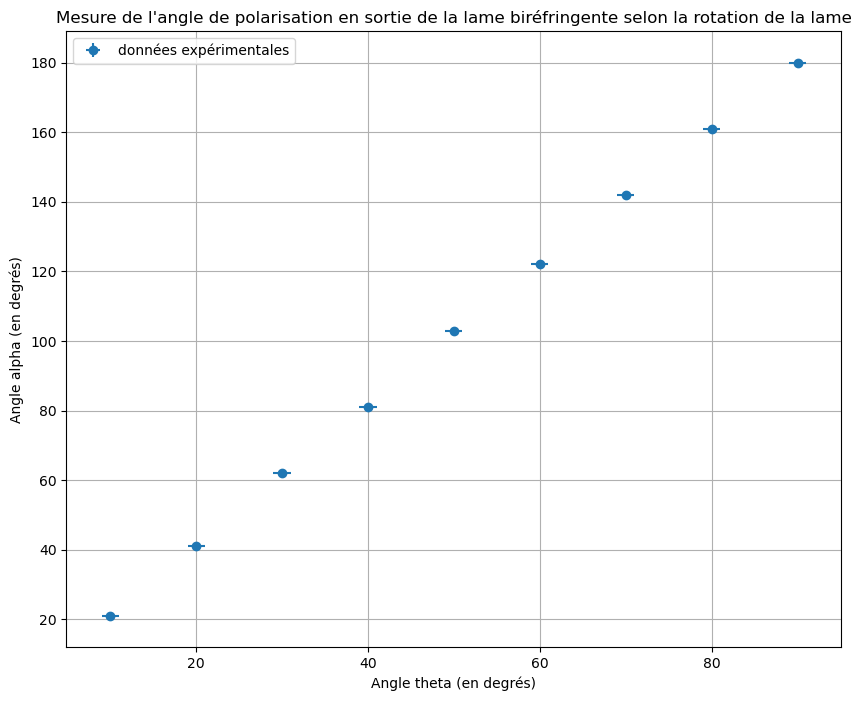

In [37]:
#Mesures
theta = np.array([10,20,30,40,50,60,70,80,90]) #en degrés
alpha = np.array([21,41,62,81,103,122,142,161,180]) #en degrés

erreurs_theta = (np.full(len(theta), 1)) #en degrés
erreurs_alpha = (np.full(len(alpha), 1)) #en degrés

# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(theta,alpha, yerr=erreurs_alpha, xerr=erreurs_theta, fmt='o', label="données expérimentales")
plt.xlabel("Angle theta (en degrés)")
plt.ylabel("Angle alpha (en degrés)")
plt.title("Mesure de l'angle de polarisation en sortie de la lame biréfringente selon la rotation de la lame")
plt.legend()
plt.grid()

On observe une droite passant par l'origine, que l'on va modéliser par une relation affine du type : $\alpha = a\theta + b$ et on s'attend à ce que $b$ soit proche de 0.

a opti = 1.9950000000021704 +- 0.012023996301884197
b opti = 1.69444444444595 +- 0.67662825204234


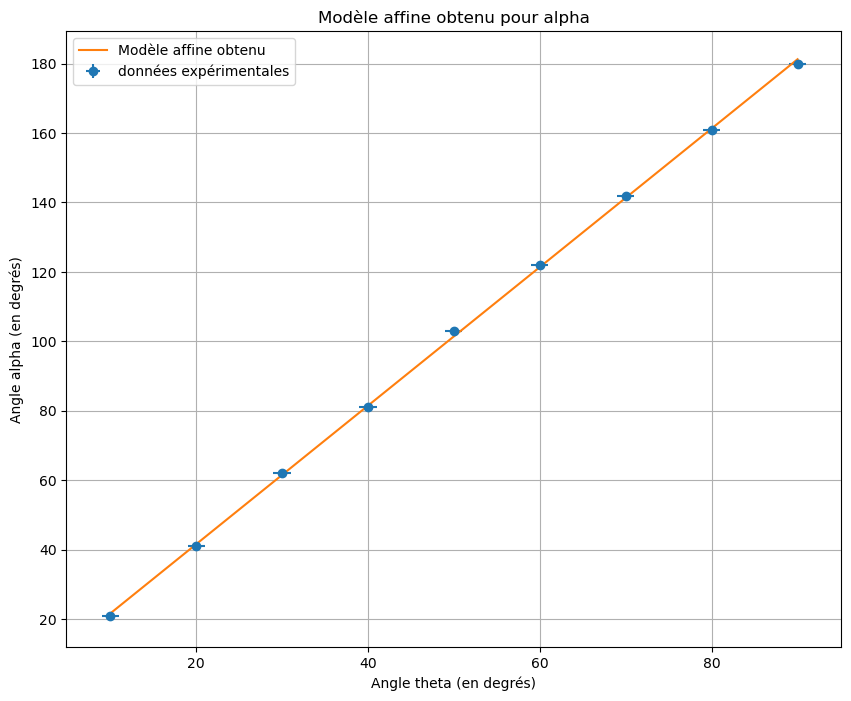

In [39]:
# Modèle
def demionde(x,a,b):
    ''' 
    Renvoie la modélisation de alpha selon theta par une droite affine
    '''
    return a*x+b


# Paramètres initiaux
a0 = 1
b0 = 1
p0 = np.array([a0,b0]) 

# Ajustement
popt, cov = curve_fit(demionde, theta, alpha, sigma=erreurs_alpha, p0=p0)
a_opti = popt[0]
b_opti = popt[1]
erreur_a = np.sqrt(cov[0,0])
erreur_b = np.sqrt(cov[1,1])

print(f"a opti = {a_opti} +- {erreur_a}")
print(f"b opti = {b_opti} +- {erreur_b}")

# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(theta,alpha, yerr=erreurs_alpha, xerr=erreurs_theta, fmt='o', label="données expérimentales")
xplot = np.linspace(theta[0], theta[-1], 50)
plt.plot(xplot, demionde(xplot, a_opti, b_opti), label="Modèle affine obtenu")
plt.xlabel("Angle theta (en degrés)")
plt.ylabel("Angle alpha (en degrés)")
plt.title("Modèle affine obtenu pour alpha")
plt.legend()
plt.grid()

On obtient bien un très bel ajustement affine, presque linéaire avec a proche de 2 et b proche de 0. 
On peut en conclure que la lame demi-onde ajoute un déphasage à l'onde, avec le déphasage égal à $\pi$ puisque $\alpha = 2\theta$ : la polarisation de l'onde reste rectiligne mais est le symétrique par rapport à l'axe neutre de la lame biréfringente.
<br>

<span style="font-size: 20px; font-weight: bold">Lame quart d'onde</span>

Pour analyser l'effet d'une lame quart d'onde, on replace le polariseur et l'analyseur en position croisée et on place la lame quart d'onde entre les deux (comme pour la lame demi-onde).  On détermine comme précédemment les angles pour lesquels on se trouve sur ses axes neutres :
- $87° \pm 1°$
- $177° \pm 1°$
- $267° \pm 1°$
- $357° \pm 1°$

On tourne ensuite la lame quart d'onde de manière à ce que l'angle $\theta$ entre la lame et le polariseur soit égal à 30°. Si l'on fait tourner l'analyseur dans cette configuration, on remarque que l'intensité lumineuse fluctue mais n'atteint pas 0.

Une instensité fluctuante après un analyseur traduit une lumière polarisée elliptique. Etant donné que notre lumière était initialement polarisée et que norte système optique ne fait que changer la polarisation, on en déduit que notre lumière doit être polarisée elliptique après la lame quart d'onde. On souhaite maintenant vérifier comment varie l'intensité en sortie de l'analyseur si on place la lame quart d'onde à 45°. On va donc mesurer la tension dans dans une photodiode en fonction de $\alpha$ l'angle de l'analyseur placé après la lame.

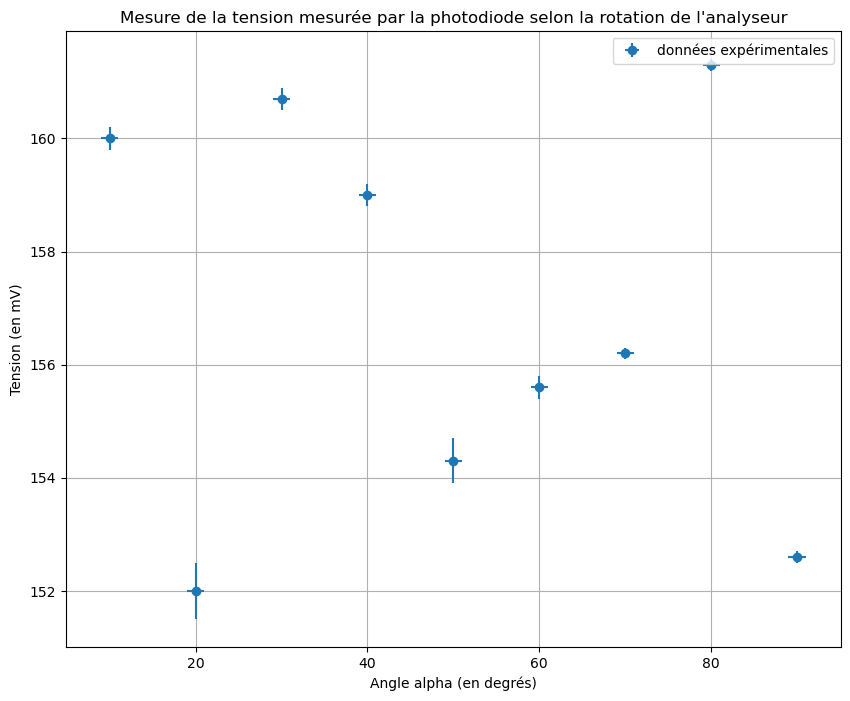

In [44]:
#Mesures
alpha = np.array([10,20,30,40,50,60,70,80,90]) #en degrés
tension = np.array([160, 152, 160.7, 159.0, 154.3, 155.6, 156.2, 161.3, 152.6]) #en mV

erreurs_alpha = (np.full(len(theta), 1)) #en degrés
erreurs_tension = np.array([0.2,0.5,0.2,0.2,0.4,0.2,0.1,0.1,0.1]) #en mV

# Graphique
plt.figure(figsize=(10,8))
plt.errorbar(alpha,tension, yerr=erreurs_tension, xerr=erreurs_alpha, fmt='o', label="données expérimentales")
plt.xlabel("Angle alpha (en degrés)")
plt.ylabel("Tension (en mV)")
plt.title("Mesure de la tension mesurée par la photodiode selon la rotation de l'analyseur")
plt.legend()
plt.grid()

On voit bien que les valeurs d'intensité fluctuent sur notre graphe, mais elles semblent ne pas trop s'écarter. En faisant plusieurs tests, on remarque que notre système optique est très instable, notamment via la photodiode, qui se trouve dans un trou de la taille du laser. Le moindre mouvement du laser entraîne donc une forte diminution de l'intensité lumineuse.
On peut considérer que l'écart est suffisamment faible pour dire que l'intensité est à peu près constante. Tournée à 45°, notre lame quart d'onde induit donc une polarisation quasiment circulaire !

Une lame quart d'onde induit donc une polarisation qui peut varier de rectiligne (pour un angle $\alpha$ = 0, donc si la polarisation est selon l'axe neutre), à circulaire pour $\alpha$ = 45°, en passant par des polarisations elliptiques.

<br>

Pour finir, on prend une lame biréfringente inconnue et on essaye de déterminer si on a une lame demi-onde ou une lame quart d'onde. Pour cela, on place un analyseur après celle-ci que l'on fait tourner, on mesure I l'intensité lumineuse après l'analyseur, et on a alors deux cas :
- si I varie entre un minimum et un maximum (ou est constante), on a une lame quart d'onde
- si I varie entre 0 et un maximum, on a une lame demi-onde

On trouve que la lame que l'on cherche est une lame demi-onde !

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Polarisation par réflexion vitreuse : mesure de l’angle de Brewster</span> <a class="anchor" id="Sec4"></a>

Durant cette partie on cherche à determiner l'angle de Brewster dans le plan d'incidence de notre faisceau, qui va nous permettre de trouver l'indice de réfraction du verre. Pour ce faire, on place une lame demi-onde en position $\alpha=45°$. Cela nous permet d'obtenir une onde polarisée avec $\theta = 90°$, ce qui correspond à une polarisation parallèle avec le plan d'incidence. Grâce à un analyseur, on vérifie bien que la polarisation est parallèle au plan d'incidence.

On fait ensuite se réfléchir la lumière obtenue avec un miroir, et on observe le rayon obtenu sur un miroir. Selon l'angle que fait le miroir avec la droite perpendiculaire au plan d'incidence, on remarque que l'intensité lumineuse obtenue sur l'écran varie fortement et finit même par être nulle.

L'angle pour lequel l'intensité lumineuse est nulle est l'angle de Brewster, et on a la relation suivante :
$$tan(\theta _B) = \frac{n1}{n2}$$
Avec n1 l'indice de réfraction du premier milieu (air ici) et n2  l'indice de réfraction du deuxième milieu (verre ici). On peut donc calculer, en connaissant l'indice n1 de l'air, l'inde ce réfraction du verre :

$$n_2 = n_1 tan(\theta _B)$$

On mesure pour notre système optique $\theta _B = 56° \pm 2° = 0.977  \pm 0.035 \text{ rad}$, et on obtient par le calcul avec $n_1 = 1$ : $n_2 = 1.48 \pm 0.11 \text{ rad}$.
On a obtenu l'incertitude par propagation : 
$$\delta n_2 = tan'(\theta _B)\delta\theta _B$$
La valeur de n2 théorique est 1.5 , La valeur trouvée est donc proche de la réalité.

<br><br><br>

<span style="font-size: 30px; font-weight: bold">Conclusion</span> <a class="anchor" id="Sec5"></a>

Lors de ce TP, on a pu voir différentes manières d'influer sur la polarisation de la lumière via un système optique. Les lames quart d'onde, demi-onde (lames biréfringentes), et les polariseurs permettent de modifier la polarisation de la lumière de manière contrôlée. On a également pu vérifier la loi de Malus, qui nous renseigne sur l'intensité lumineuse en sortie d'un analyseur qui prend comme lumière incidente une lumière polarisée. Finalement, nous avons calculé l'indice de réfraction du verre en fonction de l'angle de Brewster pour cette interface.